<a href="https://colab.research.google.com/github/AnkitKumarjadon/Linear-Regression_Capstone-Project/blob/main/Nyc_TaxiTrip_Duration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project Title : Taxi trip time Prediction : Predicting total ride
duration of taxi trips in New York City**

**Problem Description**

**Your task is to build a model that predicts the total ride duration of taxi trips in New York City. Your primary dataset is one released by the NYC Taxi, which includes pickup time, geo-coordinates, number of passengers, and several other variables.**

#Install Library  use to calculate the haversine distance

In [ ]:
!pip install haversine

**Import libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error,mean_absolute_percentage_error
import math
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import VotingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures

**Import Dataset**

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/Pyth /Copy of NYC Taxi Data.csv')

In [ ]:
df = df1.copy()

In [ ]:
df

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435
...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


**NAN or Missing Values:**

In [ ]:
df.isnull().sum()

,0
id,0
vendor_id,0
pickup_datetime,0
dropoff_datetime,0
passenger_count,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,0
dropoff_latitude,0
store_and_fwd_flag,0


##Exploratory Data Analysis

**Average Trip Duration on different vendor Id**

<Axes: xlabel='vendor_id'>

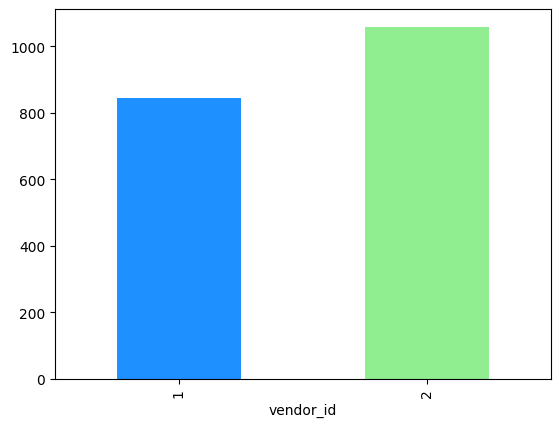

In [ ]:
df.groupby('vendor_id')['trip_duration'].mean().plot(kind='bar',color=['dodgerblue','lightgreen'])

**Relation between passenger count on Trip Duration**

<Axes: xlabel='passenger_count', ylabel='trip_duration'>

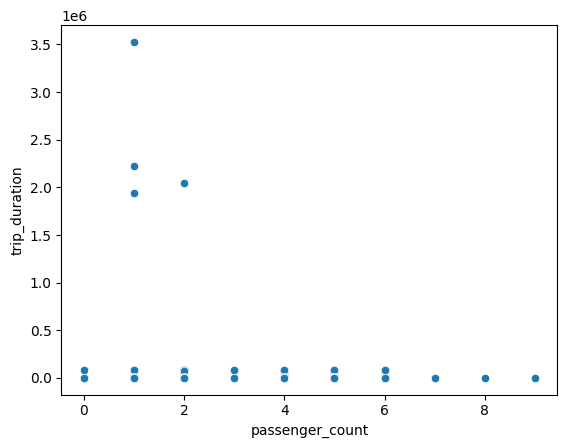

In [ ]:
sns.scatterplot(x='passenger_count',y='trip_duration',data=df)

**Relation between store_and_fwd_flag on trip duration**

In [ ]:
s_w_f = df.groupby('store_and_fwd_flag')['trip_duration'].mean()

<ipython-input-11-915736f4f51f>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(s_w_f,palette='pastel')


<Axes: xlabel='store_and_fwd_flag', ylabel='trip_duration'>

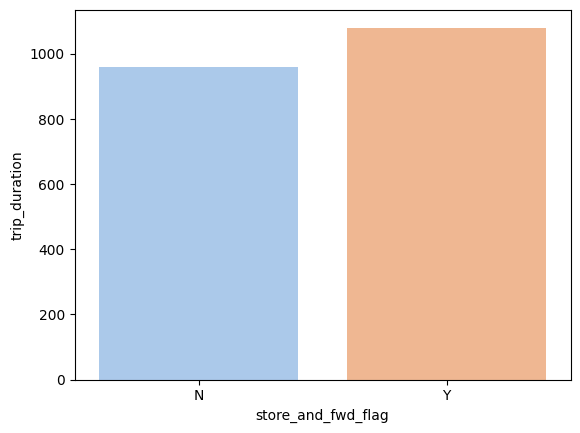

In [ ]:
sns.barplot(s_w_f,palette='pastel')

In [ ]:
df

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435
...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373


**Distribution of passenger by countplot**

<ipython-input-13-b0823a2dfb09>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['passenger_count'],palette='pastel')


<Axes: xlabel='passenger_count', ylabel='count'>

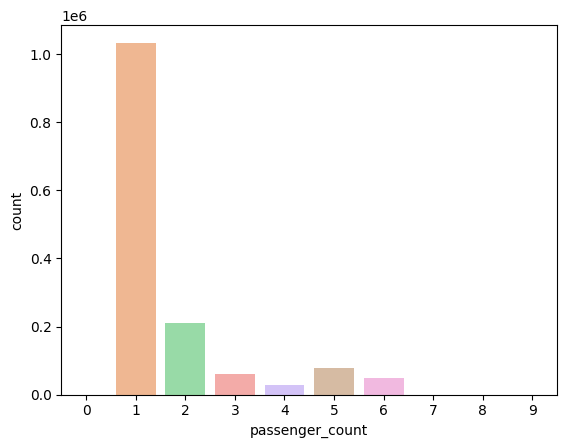

In [ ]:
sns.countplot(x=df['passenger_count'],palette='pastel')

**Distribution of Trip Duration**

<ipython-input-14-216a7c7202af>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log10(df['trip_duration']),color="r").set(title='Distribution Plot for Trip Duration')


[Text(0.5, 1.0, 'Distribution Plot for Trip Duration')]

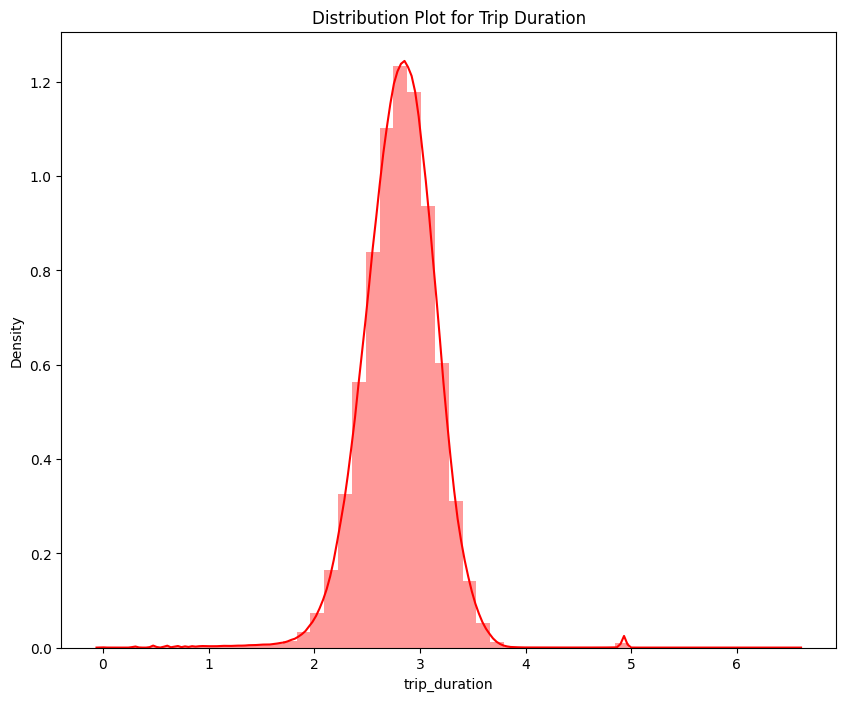

In [ ]:
plt.figure(figsize=(10,8))
sns.distplot(np.log10(df['trip_duration']),color="r").set(title='Distribution Plot for Trip Duration')

## **Feature Engineering**

In [ ]:
num_features = df.describe().columns
num_features

Index(['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'trip_duration'],
      dtype='object')

### **Histogram plot**

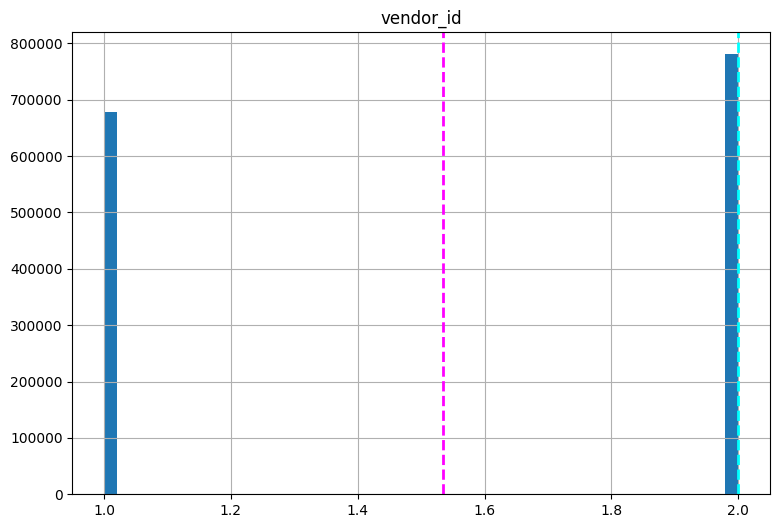

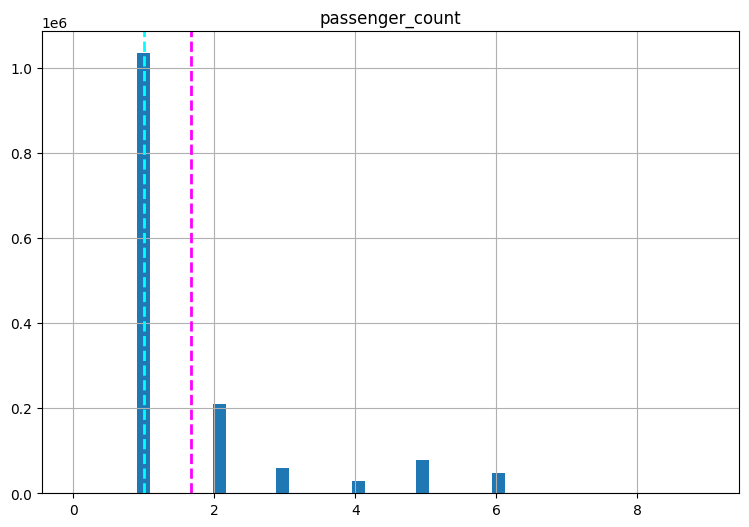

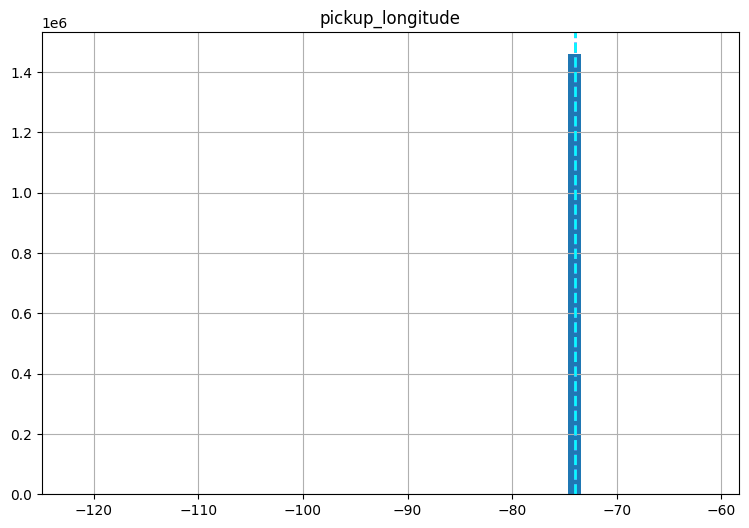

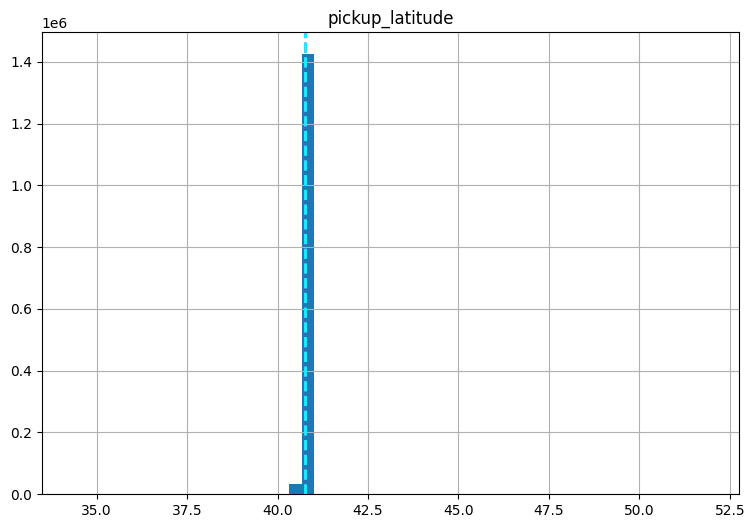

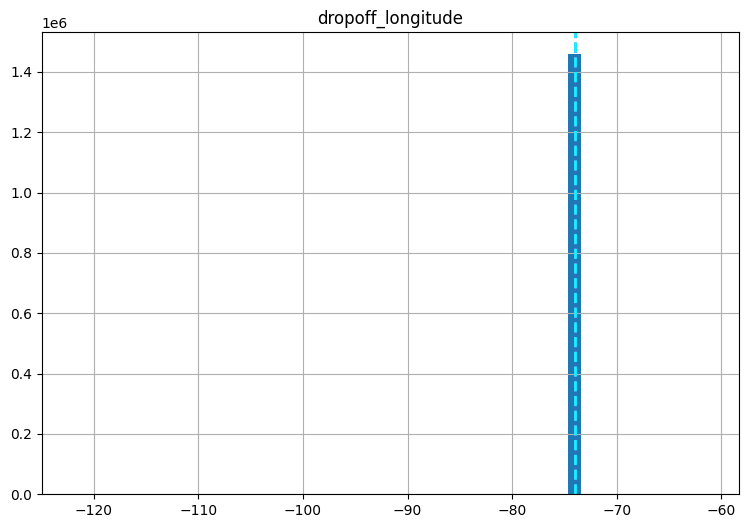

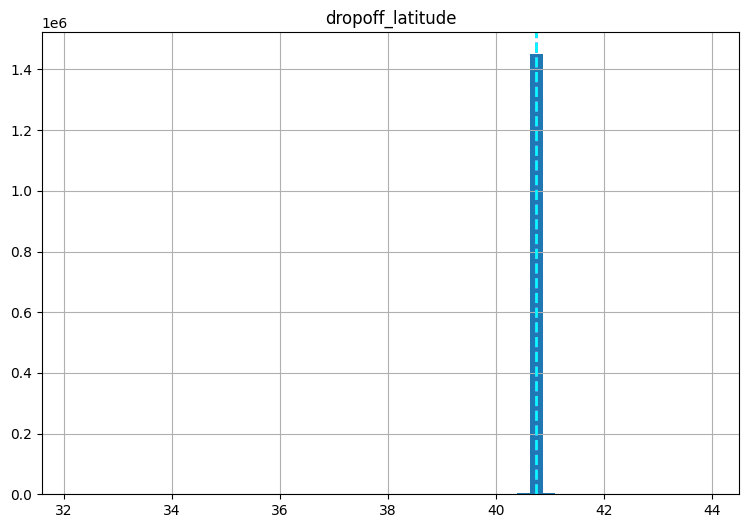

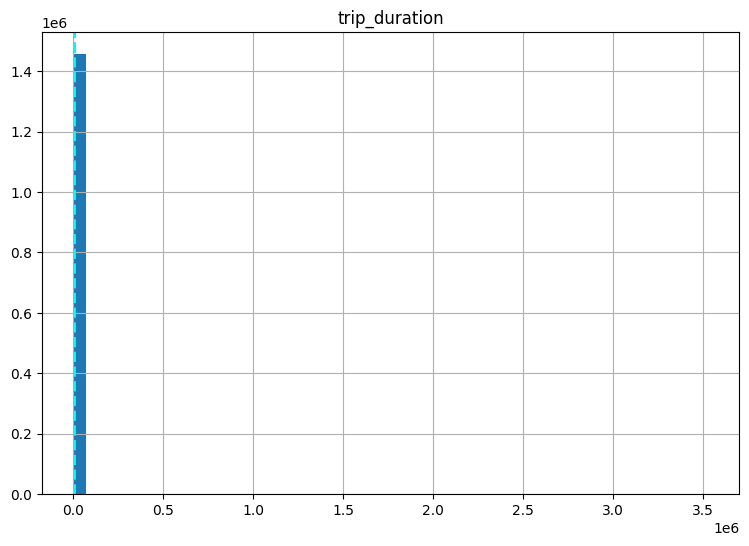

In [ ]:
for col in num_features:
    fig = plt.figure(figsize=(9,6))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins = 50, ax = ax)
    ax.axvline(feature.mean(), color = 'magenta', linestyle = 'dashed', linewidth = 2)
    ax.axvline(feature.median(), color = 'cyan', linestyle = 'dashed', linewidth = 2)
    ax.set_title(col)
plt.show()

### **Correlation & Scatter plot 'trip_duration'**

In [ ]:
num_features

Index(['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'trip_duration'],
      dtype='object')

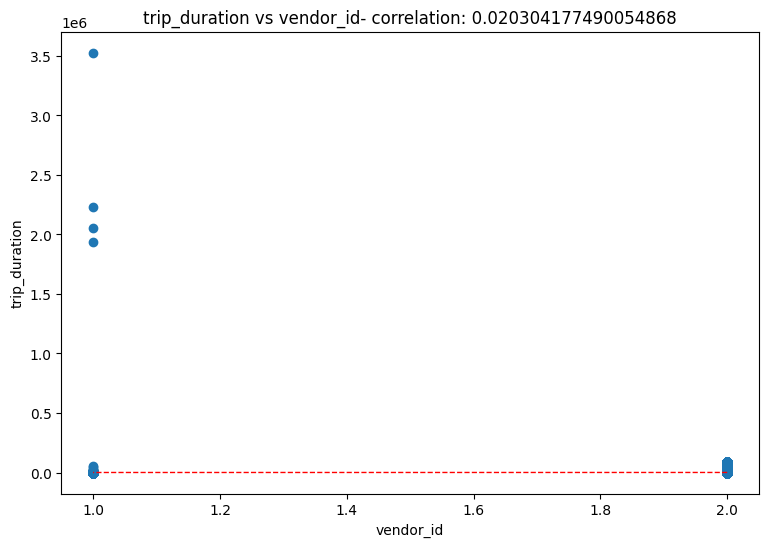

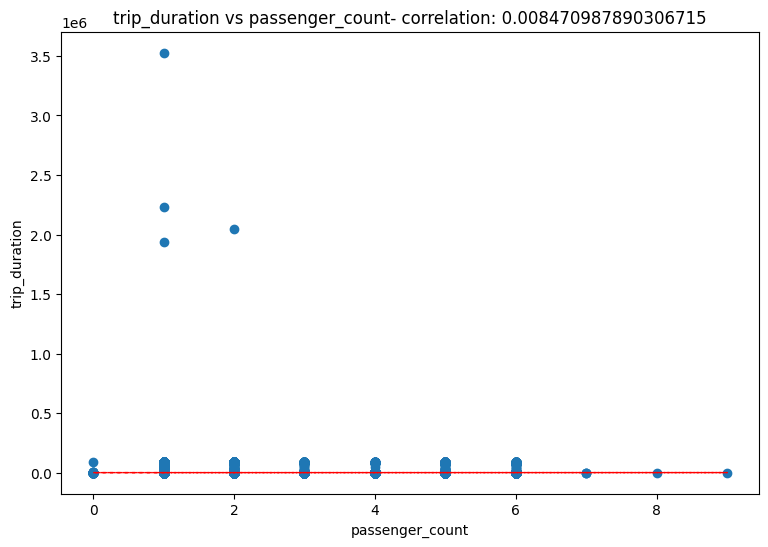

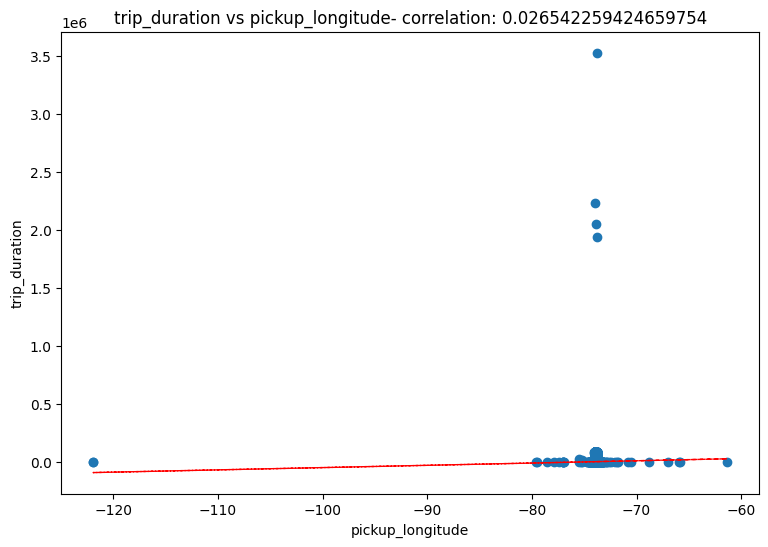

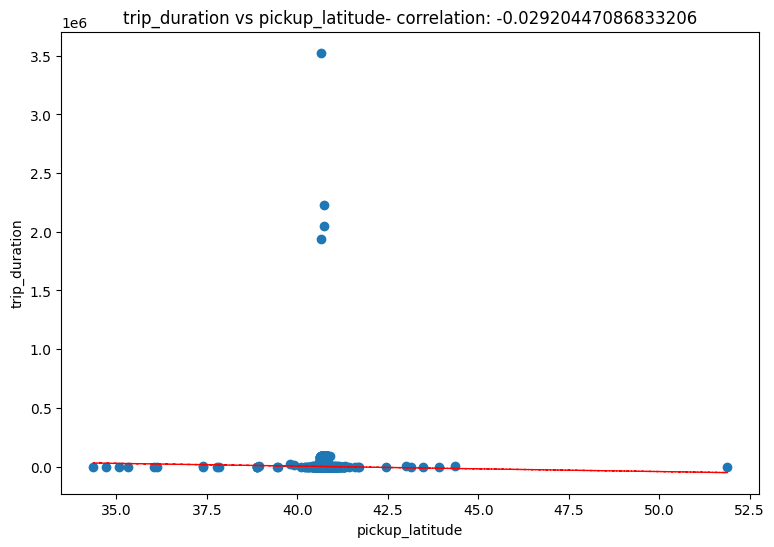

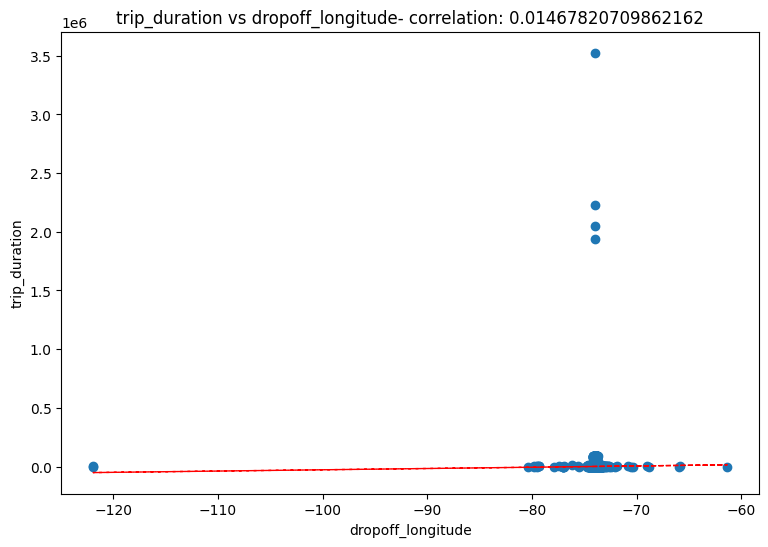

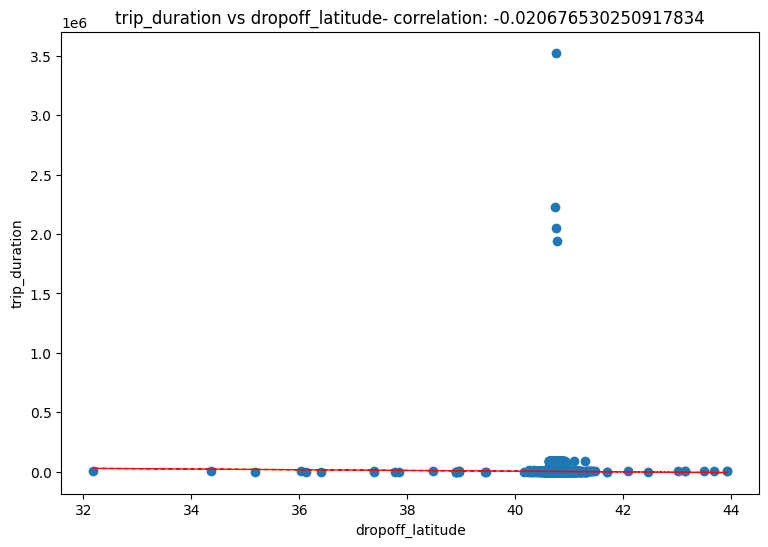

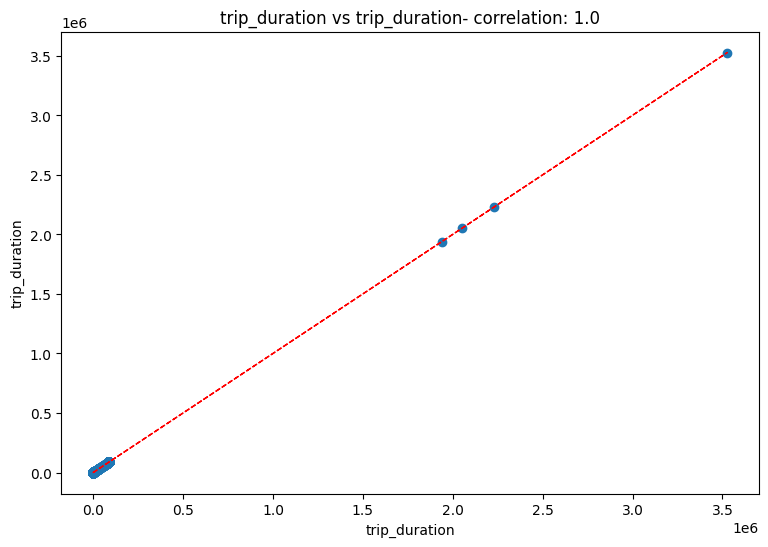

In [ ]:
for col in num_features:
  fig = plt.figure(figsize=(9,6))
  ax = fig.gca()
  feature = df[col]
  label = df['trip_duration']
  correlation = feature.corr(label)
  plt.scatter(x = feature, y = label)
  plt.xlabel(col)
  plt.ylabel('trip_duration')
  ax.set_title('trip_duration vs ' + col + '- correlation: ' + str(correlation))


  z = np.polyfit(df[col], df['trip_duration'], 1)
  y_hat = np.poly1d(z)(df[col])

  plt.plot(df[col], y_hat, 'r--', lw = 1)

##**Some Feature Engineering on other columns**

In [ ]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

##**Calculate Distance of each Trips**

In [ ]:
from haversine import haversine

In [ ]:
def calc_distance(df):
    pickup = (df['pickup_latitude'], df['pickup_longitude'])
    drop = (df['dropoff_latitude'], df['dropoff_longitude'])
    return haversine(pickup, drop)

In [ ]:
df['Distance'] = df.apply(lambda x : calc_distance(x),axis=1)

In [ ]:
df

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,Distance
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,1.498523
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,1.805510
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,6.385107
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,1.485500
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,1.188590
...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778,1.225082
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655,6.049844
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764,7.824617
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373,1.092565


**Convert trip_duration into trip_duration in minutes**

In [ ]:
df['trip_duration_minutes']=df['trip_duration']/60

In [ ]:
df

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,Distance,trip_duration_minutes
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,1.498523,7.583333
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,1.805510,11.050000
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,6.385107,35.400000
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,1.485500,7.150000
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,1.188590,7.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778,1.225082,12.966667
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655,6.049844,10.916667
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764,7.824617,12.733333
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373,1.092565,6.216667


**Create New Feature Day Name and Hour**

In [ ]:
df['pick_up_day'] = df['pickup_datetime'].dt.day_name()
df['pick_up_hour'] = df['pickup_datetime'].dt.hour

In [ ]:
df

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,Distance,trip_duration_minutes,pick_up_day,pick_up_hour
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,1.498523,7.583333,Monday,17
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,1.805510,11.050000,Sunday,0
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,6.385107,35.400000,Tuesday,11
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,1.485500,7.150000,Wednesday,19
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,1.188590,7.250000,Saturday,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778,1.225082,12.966667,Friday,13
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655,6.049844,10.916667,Sunday,7
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764,7.824617,12.733333,Friday,6
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373,1.092565,6.216667,Tuesday,15


In [ ]:
p_wd = df.groupby(['pick_up_day'])['trip_duration_minutes'].mean().reset_index()

**Average Trip Duration on each Day**

<ipython-input-30-5a7e4e1bbcdf>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='pick_up_day',y='trip_duration_minutes',data=df,palette='Accent', ci= None)
<ipython-input-30-5a7e4e1bbcdf>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='pick_up_day',y='trip_duration_minutes',data=df,palette='Accent', ci= None)


<Axes: xlabel='pick_up_day', ylabel='trip_duration_minutes'>

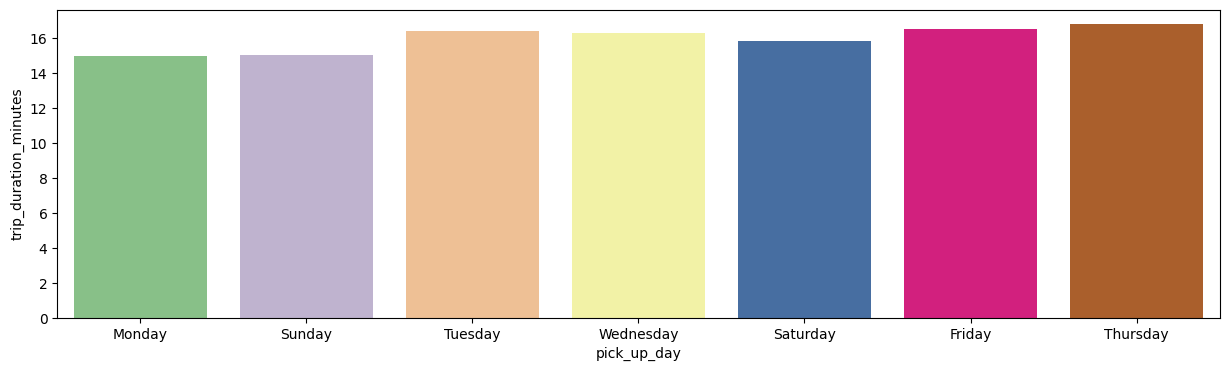

In [ ]:
plt.figure(figsize = (15,4))
sns.barplot(x='pick_up_day',y='trip_duration_minutes',data=df,palette='Accent', ci= None)

**Average Trip Duration on WeekDays and Weekend**

In [ ]:
df['week'] = df['pick_up_day'].apply(lambda x: 'Weekend' if x == 'Saturday' or x == 'Sunday' else 'Weekdays')

<Axes: xlabel='week'>

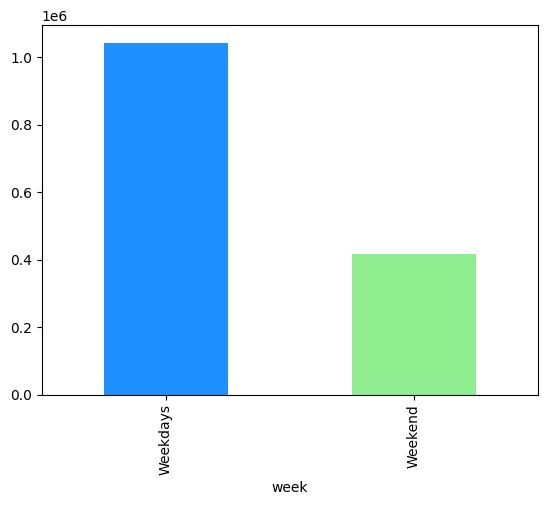

In [ ]:
df['week'].value_counts().plot(kind='bar',color=['dodgerblue','lightgreen'])

In [ ]:
def hour(h):
  if h>=17 and h<=22:
    return 'Evening'
  elif h>=7 and h<=10:
    return 'Morning'
  elif h>=11 or h<=16:
    return 'Noon'
  else:
    return 'Night'

In [ ]:
df['pick_up_hour'] = df['pick_up_hour'].apply(hour)

In [ ]:
df.drop(columns = ['id'], inplace = True)

In [ ]:
df

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,Distance,trip_duration_minutes,pick_up_day,pick_up_hour,week
0,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,1.498523,7.583333,Monday,Evening,Weekdays
1,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,1.805510,11.050000,Sunday,Noon,Weekend
2,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,6.385107,35.400000,Tuesday,Noon,Weekdays
3,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,1.485500,7.150000,Wednesday,Evening,Weekdays
4,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,1.188590,7.250000,Saturday,Noon,Weekend
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778,1.225082,12.966667,Friday,Noon,Weekdays
1458640,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655,6.049844,10.916667,Sunday,Morning,Weekend
1458641,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764,7.824617,12.733333,Friday,Noon,Weekdays
1458642,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373,1.092565,6.216667,Tuesday,Noon,Weekdays


<ipython-input-37-d247fab03c67>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['pick_up_hour'],palette='Accent')


<Axes: xlabel='pick_up_hour', ylabel='count'>

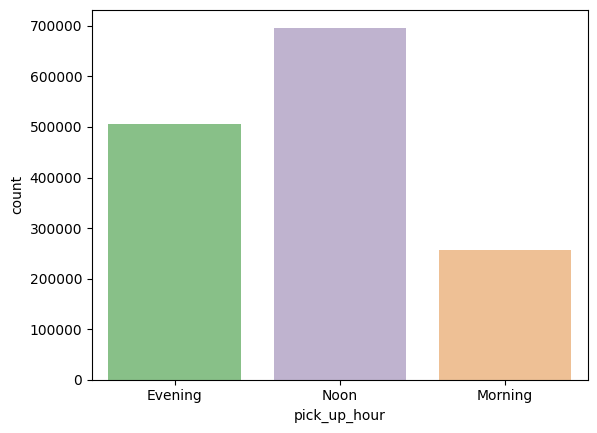

In [ ]:
sns.countplot(x=df['pick_up_hour'],palette='Accent')

In [ ]:
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])

In [ ]:
df['Month'] = df['pickup_datetime'].dt.month_name()

In [ ]:
df

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,Distance,trip_duration_minutes,pick_up_day,pick_up_hour,week,Month
0,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,1.498523,7.583333,Monday,Evening,Weekdays,March
1,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,1.805510,11.050000,Sunday,Noon,Weekend,June
2,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,6.385107,35.400000,Tuesday,Noon,Weekdays,January
3,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,1.485500,7.150000,Wednesday,Evening,Weekdays,April
4,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,1.188590,7.250000,Saturday,Noon,Weekend,March
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778,1.225082,12.966667,Friday,Noon,Weekdays,April
1458640,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655,6.049844,10.916667,Sunday,Morning,Weekend,January
1458641,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764,7.824617,12.733333,Friday,Noon,Weekdays,April
1458642,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373,1.092565,6.216667,Tuesday,Noon,Weekdays,January


<ipython-input-41-b2190d1aff9c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Month'],palette='pastel')


<Axes: xlabel='Month', ylabel='count'>

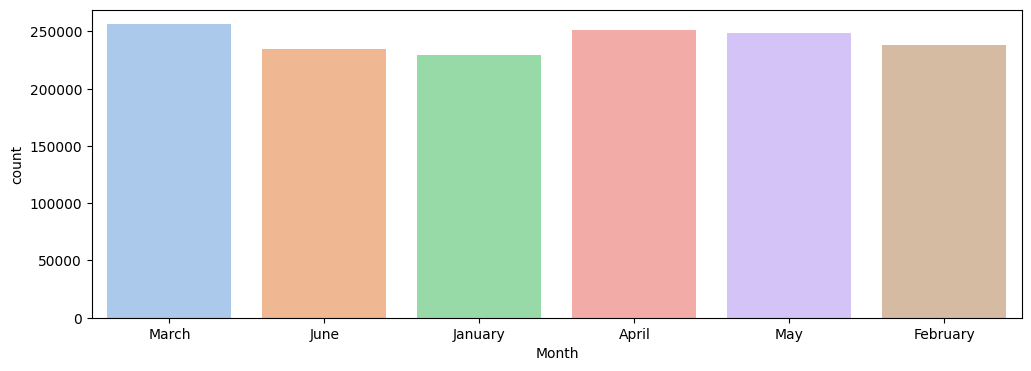

In [ ]:
plt.figure(figsize = (12,4))
sns.countplot(x=df['Month'],palette='pastel')

<Axes: xlabel='Month', ylabel='count'>

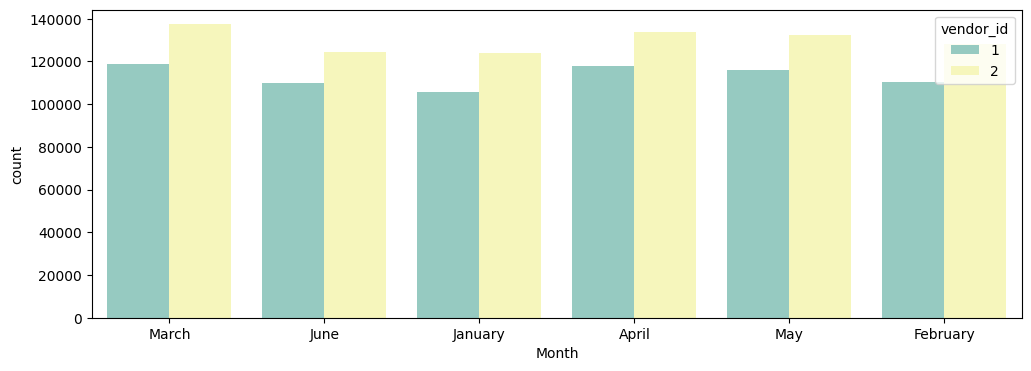

In [ ]:
plt.figure(figsize = (12,4))
sns.countplot(x=df['Month'],hue=df['vendor_id'],palette='Set3')

In [ ]:
df

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,Distance,trip_duration_minutes,pick_up_day,pick_up_hour,week,Month
0,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,1.498523,7.583333,Monday,Evening,Weekdays,March
1,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,1.805510,11.050000,Sunday,Noon,Weekend,June
2,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,6.385107,35.400000,Tuesday,Noon,Weekdays,January
3,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,1.485500,7.150000,Wednesday,Evening,Weekdays,April
4,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,1.188590,7.250000,Saturday,Noon,Weekend,March
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778,1.225082,12.966667,Friday,Noon,Weekdays,April
1458640,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655,6.049844,10.916667,Sunday,Morning,Weekend,January
1458641,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764,7.824617,12.733333,Friday,Noon,Weekdays,April
1458642,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373,1.092565,6.216667,Tuesday,Noon,Weekdays,January


In [ ]:
df.drop(columns = ['trip_duration','pickup_datetime','dropoff_datetime'], inplace = True)

In [ ]:
df

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,Distance,trip_duration_minutes,pick_up_day,pick_up_hour,week,Month
0,2,1,-73.982155,40.767937,-73.964630,40.765602,N,1.498523,7.583333,Monday,Evening,Weekdays,March
1,1,1,-73.980415,40.738564,-73.999481,40.731152,N,1.805510,11.050000,Sunday,Noon,Weekend,June
2,2,1,-73.979027,40.763939,-74.005333,40.710087,N,6.385107,35.400000,Tuesday,Noon,Weekdays,January
3,2,1,-74.010040,40.719971,-74.012268,40.706718,N,1.485500,7.150000,Wednesday,Evening,Weekdays,April
4,2,1,-73.973053,40.793209,-73.972923,40.782520,N,1.188590,7.250000,Saturday,Noon,Weekend,March
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,2,4,-73.982201,40.745522,-73.994911,40.740170,N,1.225082,12.966667,Friday,Noon,Weekdays,April
1458640,1,1,-74.000946,40.747379,-73.970184,40.796547,N,6.049844,10.916667,Sunday,Morning,Weekend,January
1458641,2,1,-73.959129,40.768799,-74.004433,40.707371,N,7.824617,12.733333,Friday,Noon,Weekdays,April
1458642,1,1,-73.982079,40.749062,-73.974632,40.757107,N,1.092565,6.216667,Tuesday,Noon,Weekdays,January


##**Feature Selection**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns = ['trip_duration_minutes']), df['trip_duration_minutes'], test_size = 0.2, random_state = 0)


df.shape, X_train.shape, X_test.shape

((1458644, 13), (1166915, 12), (291729, 12))

In [ ]:
int_columns_df = df.select_dtypes(include = ['int','float'])
int_columns_df.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,Distance,trip_duration_minutes
0,2,1,-73.982155,40.767937,-73.964630,40.765602,1.498523,7.583333
1,1,1,-73.980415,40.738564,-73.999481,40.731152,1.805510,11.050000
2,2,1,-73.979027,40.763939,-74.005333,40.710087,6.385107,35.400000
3,2,1,-74.010040,40.719971,-74.012268,40.706718,1.485500,7.150000
4,2,1,-73.973053,40.793209,-73.972923,40.782520,1.188590,7.250000


##**Correlation**

In [ ]:
int_columns_df.corr()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,Distance,trip_duration_minutes
vendor_id,1.000000,0.287415,0.007820,0.001742,0.001528,0.004496,0.008109,0.020304
passenger_count,0.287415,1.000000,0.002169,-0.005125,-0.000343,-0.002762,0.010306,0.008471
pickup_longitude,0.007820,0.002169,1.000000,0.022568,0.783582,0.100190,0.259780,0.026542
pickup_latitude,0.001742,-0.005125,0.022568,1.000000,0.114884,0.494038,-0.210354,-0.029204
dropoff_longitude,0.001528,-0.000343,0.783582,0.114884,1.000000,0.124873,0.134033,0.014678
dropoff_latitude,0.004496,-0.002762,0.100190,0.494038,0.124873,1.000000,-0.142128,-0.020677
Distance,0.008109,0.010306,0.259780,-0.210354,0.134033,-0.142128,1.000000,0.094777
trip_duration_minutes,0.020304,0.008471,0.026542,-0.029204,0.014678,-0.020677,0.094777,1.000000


<Axes: >

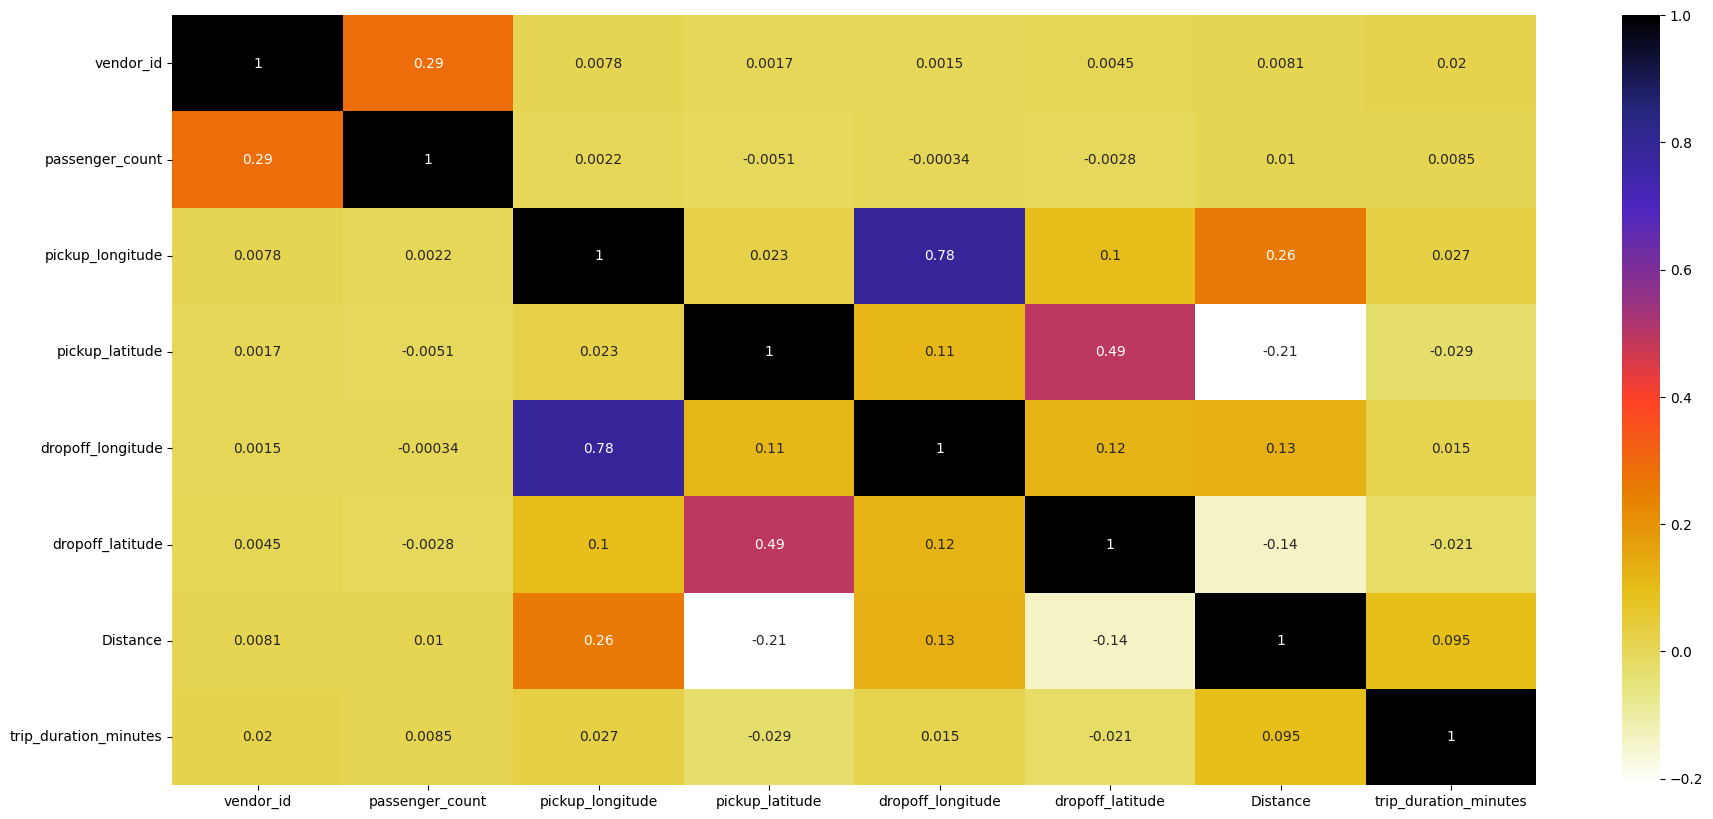

In [ ]:
plt.figure(figsize = (22,10))
sns.heatmap(int_columns_df.corr(), annot = True, cmap = plt.cm.CMRmap_r)

##**Calculate VIF**

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


def calc_vif(X):
  vif = pd.DataFrame()
  vif['variables'] = X.columns
  vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
  return vif

In [ ]:
df.describe().columns

Index(['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'Distance',
       'trip_duration_minutes'],
      dtype='object')

In [ ]:
calc_vif(df[[i for i in df.describe().columns if i not in ['trip_duration_minutes']]])

,variables,VIF
0,vendor_id,1.141509e+01
1,passenger_count,2.838841e+00
2,pickup_longitude,2.920501e+06
3,pickup_latitude,1.681616e+06
4,dropoff_longitude,2.727701e+06
5,dropoff_latitude,1.477326e+06
6,Distance,1.709128e+00


##**Feature Scaling**

In [ ]:
new_df = pd.get_dummies(df, drop_first = True, sparse = True)
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype              
---  ------                 --------------    -----              
 0   vendor_id              1458644 non-null  int64              
 1   passenger_count        1458644 non-null  int64              
 2   pickup_longitude       1458644 non-null  float64            
 3   pickup_latitude        1458644 non-null  float64            
 4   dropoff_longitude      1458644 non-null  float64            
 5   dropoff_latitude       1458644 non-null  float64            
 6   Distance               1458644 non-null  float64            
 7   trip_duration_minutes  1458644 non-null  float64            
 8   store_and_fwd_flag_Y   1 non-null        Sparse[bool, False]
 9   pick_up_day_Monday     1 non-null        Sparse[bool, False]
 10  pick_up_day_Saturday   1 non-null        Sparse[bool, False]
 11  pick_up_day_Sunday     1

<ipython-input-53-efca415f0d5c>:2: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  new_df.info()


In [ ]:
X = new_df.drop(columns = ['trip_duration_minutes'])
y = new_df['trip_duration_minutes']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 42)

In [ ]:
from sklearn.preprocessing import PowerTransformer, MinMaxScaler, StandardScaler
yeo = MinMaxScaler()
x_train = yeo.fit_transform(x_train)
x_test = yeo.transform(x_test)

##**Create Function for scores**

In [ ]:
mean_absolut_error = []
mean_sq_error=[]
root_mean_sq_error=[]
training_score =[]
r2_list=[]
adj_r2_list=[]



def score_metrix (model,X_train,X_test,Y_train,Y_test):


  model.fit(X_train,Y_train)


  training  = model.score(X_train,Y_train)
  print("Training score  =", training)

  try:

    print(f"The best parameters found out to be :{model.best_params_} \nwhere model best score is:  {model.best_score_} \n")
  except:
    pass




  if model == LinearRegression() or model == Lasso() or model == Ridge():
    Y_pred = model.predict(X_test)


    MAE  = mean_absolute_error(Y_test**2,Y_pred**2)
    print("MAE :" , MAE)


    MSE  = mean_squared_error(Y_test**2,Y_pred**2)
    print("MSE :" , MSE)


    RMSE = np.sqrt(MSE)
    print("RMSE :" ,RMSE)



    r2 = r2_score(Y_test**2,Y_pred**2)
    print("R2 :" ,r2)

    adj_r2=1-(1-r2_score(Y_test**2,Y_pred**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
    print("Adjusted R2 : ",adj_r2,'\n')

  else:

    Y_pred = model.predict(X_test)


    MAE  = mean_absolute_error(Y_test,Y_pred)
    print("MAE :" , MAE)

    MSE  = mean_squared_error(Y_test,Y_pred)
    print("MSE :" , MSE)


    RMSE = np.sqrt(MSE)
    print("RMSE :" ,RMSE)



    r2 = r2_score(Y_test,Y_pred)
    print("R2 :" ,r2)

    adj_r2=1-(1-r2_score(Y_test,Y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
    print("Adjusted R2 : ",adj_r2,'\n')

    try:


      best = model.best_estimator_
      features = X_train.columns
      importances = best.feature_importances_
      indices = np.argsort(importances)
      plt.figure(figsize=(10,15))
      plt.title('Feature Importance')
      plt.barh(range(len(indices)), importances[indices], color='red', align='center')
      plt.yticks(range(len(indices)), [features[i] for i in indices])
      plt.xlabel('Relative Importance')
      plt.show()

    except:
      pass


  mean_absolut_error.append(MAE)
  mean_sq_error.append(MSE)
  root_mean_sq_error.append(RMSE)
  training_score.append(training)
  r2_list.append(r2)
  adj_r2_list.append(adj_r2)

  print('*'*80)

  try :
    print("coefficient \n",model.coef_)
    print('\n')
    print("Intercept  = " ,model.intercept_)
  except:
    pass
  print('\n')
  print('*'*20, 'ploting the graph of Actual and predicted only with 80 observation', '*'*20)


  try:

    plt.figure(figsize=(15,7))
    plt.plot((Y_pred)[:80])
    plt.plot((np.array(Y_test)[:80]))
    plt.legend(["Predicted","Actual"])
    plt.show()
  except:
    pass

##**Linear Regression**

Training score  = 0.008483676161950338
MAE : 7.670298969737082
MSE : 2885.886987353996
RMSE : 53.72045222588876
R2 : 0.02562382634166993
Adjusted R2 :  0.025565038514234195 

********************************************************************************
coefficient 
 [ 3.21041473e+00  4.19429561e+00  1.33946068e+03 -4.42558705e+02
 -4.82848167e+02 -1.77085829e+02  4.79659551e+01  1.23678260e+00
 -1.78267907e+00 -3.96078507e+14 -3.96078507e+14  4.91232601e-01
  4.41613812e-01 -1.41718959e-02  2.04785453e-01  6.09828499e-01
  3.96078507e+14 -2.11038087e-01 -6.10292594e-01  5.93363360e-01
 -6.35009670e-01  4.50391680e-01]


Intercept  =  -102.50252947091874


******************** ploting the graph of Actual and predicted only with 80 observation ********************


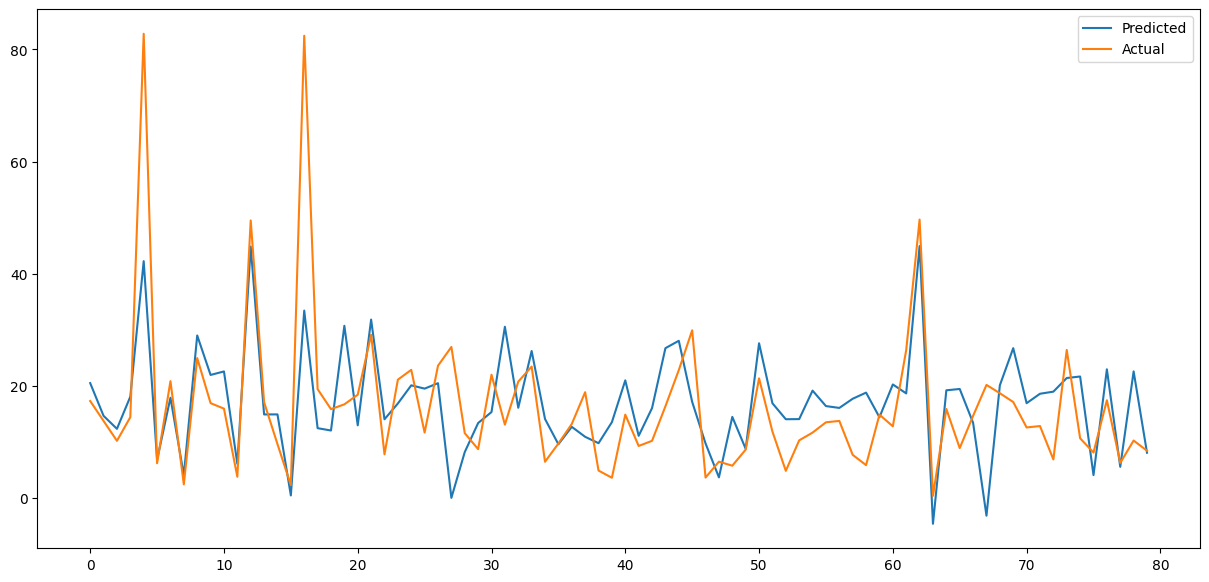

In [ ]:
score_metrix(LinearRegression(),x_train,x_test,y_train,y_test)

##**Lasso Regression With Hyperparameter Tunning**

In [ ]:
L1 = Lasso(alpha = 1)

Training score  = 0.0034726675407082963
MAE : 9.33347318020737
MSE : 2930.249537354496
RMSE : 54.1317793662327
R2 : 0.010645481065978402
Adjusted R2 :  0.010585789537897017 

********************************************************************************
coefficient 
 [ 0.          0.          0.         -0.          0.         -0.
 13.50289247  0.         -0.         -0.         -0.          0.
  0.          0.         -0.          0.         -0.         -0.
 -0.          0.         -0.          0.        ]


Intercept  =  9.595009538146394


******************** ploting the graph of Actual and predicted only with 80 observation ********************


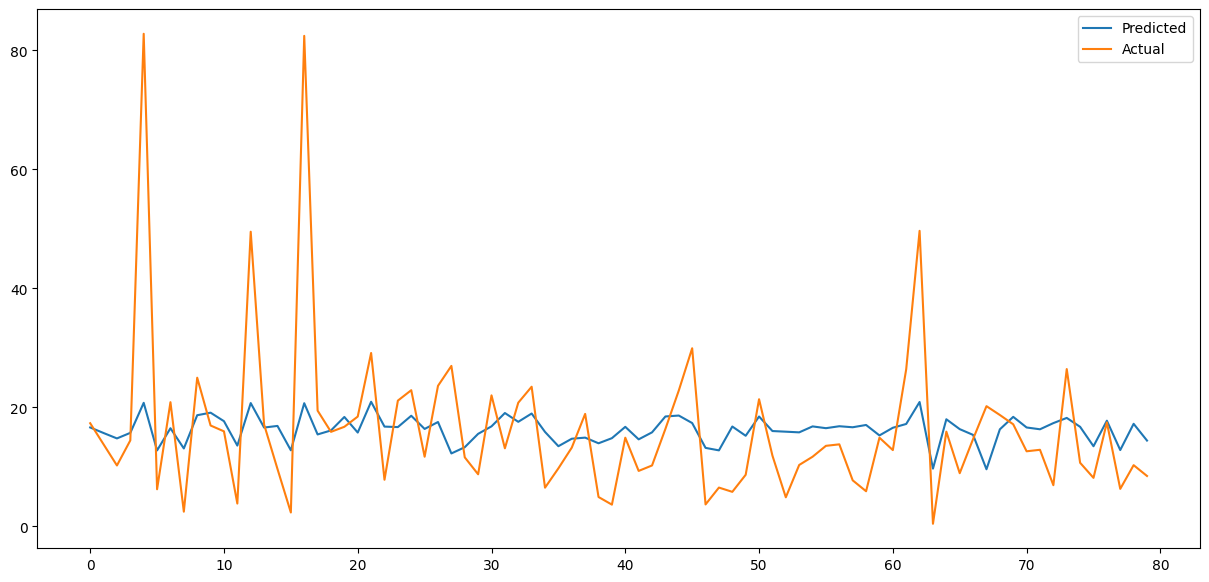

In [ ]:
score_metrix(L1,x_train,x_test,y_train,y_test)

##**Ridge Regression With Hyperparameter Tunning**

Training score  = 0.008484281005854966
The best parameters found out to be :{'alpha': 1e-08} 
where model best score is:  0.015438932233289005 

MAE : 7.672325585896701
MSE : 2885.847115342252
RMSE : 53.720081118165226
R2 : 0.025637288524496205
Adjusted R2 :  0.025578501509285312 

********************************************************************************


******************** ploting the graph of Actual and predicted only with 80 observation ********************


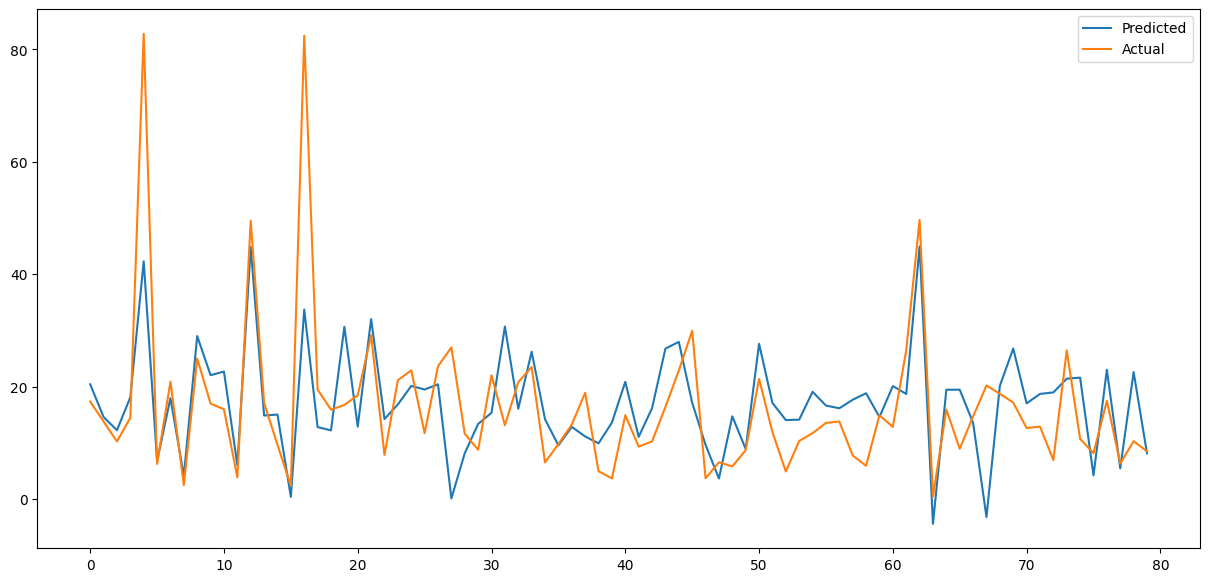

In [ ]:
L2 = Ridge()


parameters = {'alpha':[1e-15,1e-10,1e-8]}


l2_cv = GridSearchCV(L2, parameters, scoring = 'r2', cv = 5)
score_metrix(l2_cv,x_train,x_test,y_train,y_test)

##**Polynomial Regression**

In [ ]:
poly = PolynomialFeatures(2)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

Training score  = 0.010197160083506684
MAE : 7.310771077365065
MSE : 2878.9208140155597
RMSE : 53.65557579614219
R2 : 0.027975849602556502
Adjusted R2 :  0.027239597007739924 

********************************************************************************
coefficient 
 [-1.81976619e+07 -2.20133124e+12  5.49752258e+02  4.17651792e+03
 -1.98426457e+03  1.81380006e+03 -2.44411670e+02 -1.35152231e+02
 -3.71736254e+13  1.62647539e+13  4.14846330e+13  8.22065000e+12
 -1.94592691e+12  5.36536250e+12  1.50880668e+13 -2.66878888e+12
 -1.47071757e+13 -2.23284955e+13 -9.73034130e+11  5.44796434e+12
  3.38179942e+12 -5.09901130e+13  5.01366752e+13  2.20133124e+12
 -1.17628835e+01 -9.48451540e+02  1.54626402e+02  4.69121088e+02
 -8.68512787e+01 -2.40520765e-01  3.17428827e+12 -4.12556627e-01
 -3.23406759e+12 -3.23406759e+12 -7.81250000e-03 -8.06640625e-01
 -5.11718750e-01 -4.58496094e-01  4.64843750e-01  3.23406759e+12
 -1.38671875e+00 -1.31738281e+00  8.59375000e-02  3.32031250e-02
  1.17187500e

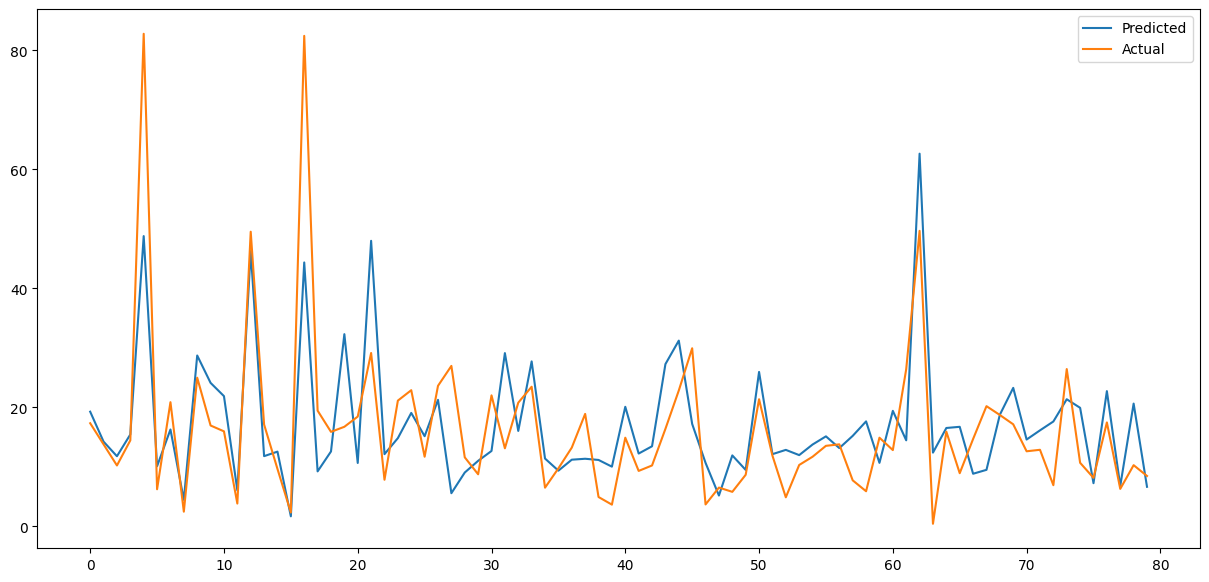

In [ ]:
score_metrix(LinearRegression(),x_train_poly,x_test_poly,y_train,y_test)